# Preprocesamiento de los datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import importlib

In [13]:
import basic_preprocessing as bp
import auxiliares_data as aux_d
import crear_dataset as cd

## Parte 1: Limpieza de datos
### Usuarios
Cambios para limpiar los datos de usuarios:
- eliminar la última columna que no esta en 2024
- pasar al mismo formato (sacar comillas donde corresponde)
- eliminar primera fila con los nombres de las features
- cortar hasta agosto 2024

In [3]:
# Definimos los paths para los archivos de usuarios de cada año usando os.path.join
BASE_DIR = os.getcwd()

usuarios_2023_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'usuarios', 'usuarios_ecobici_2023.csv')
usuarios_2022_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'usuarios', 'usuarios_ecobici_2022.csv')
usuarios_2021_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'usuarios', 'usuarios_ecobici_2021.csv')
usuarios_2020_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'usuarios', 'usuarios_ecobici_2020.csv')
usuarios_2024_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'usuarios', 'usuarios_ecobici_2024.csv')

In [5]:
importlib.reload(bp)
df_users, users_cut = bp.unite_usuarios(
    usuarios_2024_path,
    usuarios_2023_path,
    usuarios_2022_path,
    usuarios_2021_path,
    usuarios_2020_path
)

# guardamos df_users en un archivo csv
df_users.to_csv(os.path.join(BASE_DIR, '..', 'data', 'clean', 'usuarios_ecobici.csv'), index=False)

c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\basic_preprocessing.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


### Recorridos

Cambios para limpiar los datos del recorrido:



In [6]:
#Definimos los paths para los archivos de recorridos de cada año usando os.path.join
recorridos_2024_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'recorridos', 'trips_2024.csv')
recorridos_2023_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'recorridos', 'trips_2023.csv')
recorridos_2022_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'recorridos', 'trips_2022.csv')
recorridos_2021_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'recorridos', 'trips_2021.csv')
recorridos_2020_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'recorridos', 'trips_2020.csv')

In [59]:
importlib.reload(bp)
df_recs, eliminados_rec = bp.limpiar_recorridos(
    recorridos_2024_path,
    recorridos_2023_path,
    recorridos_2022_path,
    recorridos_2021_path,
    None #recorridos_2020_path
)

# guardamos df_recs en un archivo csv
df_recs.to_csv(os.path.join(BASE_DIR, '..', 'data', 'clean', 'recorridos_ecobici.csv'), index=False)

c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\basic_preprocessing.py:143: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv(csv_2023, **read_csv_params)


Rango de fechas original:
2024-01-01 00:06:50 a 2024-12-31 23:58:25
Fecha límite aplicada: 2024-08-31 23:59:59
Rango de fechas después de cortar:
2024-01-01 00:06:50 a 2024-08-31 23:54:32
Filas eliminadas: 1403639


In [60]:
#Unificamos los datasets de usuarios y recorridos
importlib.reload(bp)
print(df_users.head())

df_unificado = bp.unificar_datasets(df_recs, df_users)

# guardamos df_unificado en un archivo csv
df_unificado.to_csv(os.path.join(BASE_DIR, '..', 'data', 'clean', 'usuarios_recorridos_ecobici.csv'), index=False)

  id_usuario genero_usuario edad_usuario fecha_alta hora_alta
0     629007         FEMALE         25.0 2020-01-01  18:08:32
1     628464         FEMALE         57.0 2020-01-01  10:11:03
2     628448           MALE         64.0 2020-01-01  09:49:05
3     628373           MALE         22.0 2020-01-01  01:31:03
4     628976           MALE         33.0 2020-01-01  17:47:35


Estadísticas del merge:
Total recorridos: 10560871
Recorridos con información de usuario: 6068228
Recorridos sin información de usuario: 4492643
Porcentaje de match: 57.46%


In [61]:
importlib.reload(aux_d)
aux_d.get_muestras(df_unificado)

,Id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,género,edad_usuario,fecha_alta,hora_alta
0,18999377,565,2023-09-05 14:59:57,262,349 - Plaza Saenz Peña,Andrés Lamas 1699,-58.467297,-34.609709,2023-09-05 15:09:22,342,218 - Campana,1523 Campana,-58.484297,-34.616813,182948,FIT,FEMALE,NaN,NaT,NaN
1,11378975,632,2021-06-26 06:00:57,91,091 - Pasco,708 Pasco & Chile,-58.397602,-34.617448,2021-06-26 06:11:29,24,024 - ALSINA,Adolfo Alsina& Bernardo De Irigoyen,-34.610583,"-34.610583,-58.3808943",640310,ICONIC,FEMALE,23.0,2020-01-15,17:43:41
2,14244217,359,2022-04-21 19:56:04,73,073 - Ruy Díaz de Guzmán,Avenida Martin Garcia y Ruy Díaz de Guzmán,-58.371823,-34.630681,2022-04-21 20:02:03,433,273 - Plazoleta Colombia,1619 Brandsen,-58.373726,-34.637697,404564,ICONIC,OTHER,NaN,NaT,NaN
3,17267286,797,2023-02-17 04:04:51,187,261 - QUINTEROS LIDORO,"1483 Quinteros, Lidoro J. Av.",-58.450897,-34.552571,2023-02-17 04:18:08,187,261 - QUINTEROS LIDORO,"1483 Quinteros, Lidoro J. Av.",-58.450897,-34.552571,918518,ICONIC,MALE,40,2022-11-05,17:08:56
4,17793583,"1,366",2023-04-11 20:20:31,65,065 - Julián Álvarez,3822 Guemes,-58.415787,-34.587312,2023-04-11 20:43:17,25,025 - Plaza Guemes,"Salguero, Jeronimo & Mansilla, Lucio Norberto,...",-58.416118,-34.589427,976759,FIT,FEMALE,19,2023-04-11,19:49:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,19019056,"1,216",2023-09-07 19:11:30,44,044 - Ecoparque,"Av. Del Libertador, 3260",-58.413883,-34.575515,2023-09-07 19:31:46,193,193 - ARENALES Y AGUERO,Arenales y Aguero,-58.406165,-34.590863,879115,FIT,MALE,23,2022-08-07,14:53:42
996,14233028,914,2022-04-21 07:18:55,50,050 - Hospital Rivadavia,2516 Pereyra Lucena,-58.401080,-34.583735,2022-04-21 07:34:09,210,335 - General Urquiza,Figueroa Alcorta & Sarmiento,-58.411278,-34.572165,670145,ICONIC,MALE,66.0,2020-06-24,16:08:37
997,13310065,"1,100",2022-01-21 16:21:35,54,054 - Acuña de Figueroa,Lavalle 4015,-58.422069,-34.598210,2022-01-21 16:39:55,199,199 - ESTADOS UNIDOS Y BOEDO,3568 Estados Unidos & Boedo Av.,-58.416014,-34.62226,97988,FIT,MALE,NaN,NaT,NaN
998,12525040,842,2021-11-03 09:43:47,364,381 - Matienzo Y Arce,"1798 Matienzo, Benjamin, Teniente",-58.434470,-34.568693,2021-11-03 09:57:49,206,159 - Fitz Roy & Gorriti,Fitz Roy & Gorriti,-34.58495,"-34.58495,-58.437339",671998,ICONIC,MALE,29.0,2020-07-17,18:03:08


{2: 33391, 3: 47655, 4: 43729, 5: 102730, 6: 41035, 7: 17150, 8: 102291, 9: 90876, 12: 48765, 13: 32637, 14: 127526, 17: 65406, 20: 23897, 21: 26031, 22: 31567, 23: 34502, 24: 18015, 25: 73525, 26: 41089, 27: 40458, 28: 1, 29: 85846, 30: 50127, 31: 6945, 32: 37696, 33: 61271, 35: 31073, 36: 20086, 38: 44772, 41: 33497, 42: 2502, 43: 19287, 44: 53224, 45: 30906, 46: 34998, 48: 21608, 49: 21488, 50: 48979, 51: 16534, 54: 88148, 56: 54701, 57: 9305, 58: 29553, 59: 29231, 60: 23130, 61: 11425, 63: 34410, 64: 44914, 65: 59297, 66: 79114, 68: 16361, 69: 71263, 70: 59621, 71: 41327, 73: 36157, 74: 60960, 75: 55193, 76: 41769, 77: 10562, 79: 55471, 80: 34034, 82: 60761, 83: 60159, 84: 13557, 85: 58275, 86: 34592, 87: 32660, 89: 50201, 91: 40585, 92: 20596, 93: 42522, 94: 30237, 95: 27240, 96: 86644, 98: 25066, 99: 53341, 101: 32912, 102: 14543, 104: 34917, 105: 178, 107: 23534, 111: 62427, 112: 29649, 114: 19121, 116: 53195, 117: 52072, 118: 30320, 120: 29864, 121: 75383, 122: 19654, 124: 4649

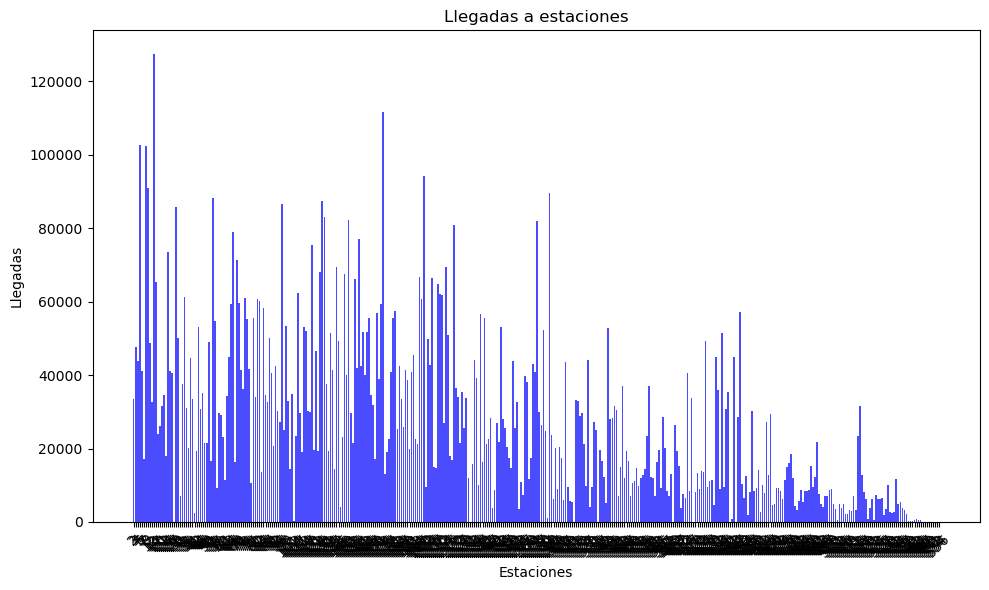

In [66]:
importlib.reload(aux_d)
count = aux_d.count_samples(df_unificado)
print(count)

# histograma de llegada a estaciones
stations = list(count.keys())
print(len(stations))
arrivals = list(count.values())
aux_d.plot_histogram(stations, arrivals, 'Llegadas a estaciones', 'Estaciones', 'Llegadas')


# Crear dataset
generamos un dataset donde cada muestra es la cantidad de bicis llegadas a una estación específica en una hora específica.

In [63]:
importlib.reload(cd)
dataset = cd.crear_dataset_prediccion_bicis(df_unificado, 14)


# Preparar para ML (SIN hora)
X, y, feature_names, dataset_ml = cd.preparar_para_ml(dataset, incluir_tiempo=True)


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

In [64]:
dataset.to_csv(os.path.join(BASE_DIR, '..', 'data', 'processed', 'dataset_14.csv'), index=False)

In [65]:

print(count)
aux_d.get_muestras(dataset)

{2: 33391, 3: 47655, 4: 43729, 5: 102730, 6: 41035, 7: 17150, 8: 102291, 9: 90876, 12: 48765, 13: 32637, 14: 127526, 17: 65406, 20: 23897, 21: 26031, 22: 31567, 23: 34502, 24: 18015, 25: 73525, 26: 41089, 27: 40458, 28: 1, 29: 85846, 30: 50127, 31: 6945, 32: 37696, 33: 61271, 35: 31073, 36: 20086, 38: 44772, 41: 33497, 42: 2502, 43: 19287, 44: 53224, 45: 30906, 46: 34998, 48: 21608, 49: 21488, 50: 48979, 51: 16534, 54: 88148, 56: 54701, 57: 9305, 58: 29553, 59: 29231, 60: 23130, 61: 11425, 63: 34410, 64: 44914, 65: 59297, 66: 79114, 68: 16361, 69: 71263, 70: 59621, 71: 41327, 73: 36157, 74: 60960, 75: 55193, 76: 41769, 77: 10562, 79: 55471, 80: 34034, 82: 60761, 83: 60159, 84: 13557, 85: 58275, 86: 34592, 87: 32660, 89: 50201, 91: 40585, 92: 20596, 93: 42522, 94: 30237, 95: 27240, 96: 86644, 98: 25066, 99: 53341, 101: 32912, 102: 14543, 104: 34917, 105: 178, 107: 23534, 111: 62427, 112: 29649, 114: 19121, 116: 53195, 117: 52072, 118: 30320, 120: 29864, 121: 75383, 122: 19654, 124: 4649

,fecha_hora,fecha,hora,id_estacion,dia_semana,mes,año,es_feriado,bicis_llegaron_h1,bicis_llegaron_h2,bicis_llegaron_h3,bicis_llegaron_h4,bicis_llegaron_h5,bicis_llegaron_h6,total_bicis_salieron,pct_mujeres_salieron,pct_hombres_salieron,promedio_edad_salieron,pct_iconic_salieron,target
0,2024-06-20 17:00:00,2024-06-20,17,14,3,6,2024,1,9.0,3.0,2.0,9.0,2.0,0.0,7.0,0.0,1.0,28.142857,0.00,8.0
1,2024-05-03 01:00:00,2024-05-03,1,14,4,5,2024,0,3.0,7.0,2.0,1.0,8.0,8.0,0.0,0.0,0.0,31.625550,0.00,3.0
2,2021-08-14 07:00:00,2021-08-14,7,14,5,8,2021,0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,31.625550,0.00,2.0
3,2024-04-15 09:00:00,2024-04-15,9,14,0,4,2024,0,1.0,0.0,3.0,2.0,0.0,0.0,1.0,0.0,1.0,20.000000,1.00,0.0
4,2023-03-09 16:00:00,2023-03-09,16,14,3,3,2023,0,8.0,3.0,7.0,4.0,4.0,3.0,4.0,0.0,1.0,37.250000,0.50,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-08-29 16:00:00,2024-08-29,16,14,3,8,2024,0,9.0,9.0,4.0,8.0,1.0,4.0,17.0,0.0,1.0,25.900000,0.00,11.0
996,2021-05-24 16:00:00,2021-05-24,16,14,0,5,2021,1,8.0,3.0,4.0,3.0,0.0,3.0,12.0,0.0,1.0,31.285714,1.00,11.0
997,2022-05-28 14:00:00,2022-05-28,14,14,5,5,2022,0,5.0,0.0,0.0,3.0,2.0,1.0,3.0,0.0,1.0,24.333333,0.00,2.0
998,2023-01-16 12:00:00,2023-01-16,12,14,0,1,2023,0,4.0,4.0,3.0,3.0,0.0,0.0,4.0,0.0,1.0,24.500000,0.75,4.0
